Processando base de dados

Variáveis: file, alg, min_support, separar_paragrafos

In [65]:
import importlib
import utils.pre_processing_news as ppn

importlib.reload(ppn)

#file = "manifestacao_bolsonaro"
#file = "resgate_juliana_marins"
file = "morte_juliana_marins"
#file = "manifestacao_resgate"
separar_paragrafos = True
isTitulo = False

input_file = "datasets/" + file + ".csv"
column = "Título" if isTitulo else "Texto"

# 1. Pré processando base de dados
print("Pré-processando textos...")
pre_processing_result, noticias = ppn.pre_processing_database(
    file_path = input_file,
    separar_paragrafos = separar_paragrafos,
    column=column
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pré-processando textos...


Gerando Trie of Rules

Gerando árvore de regras (TOR)...


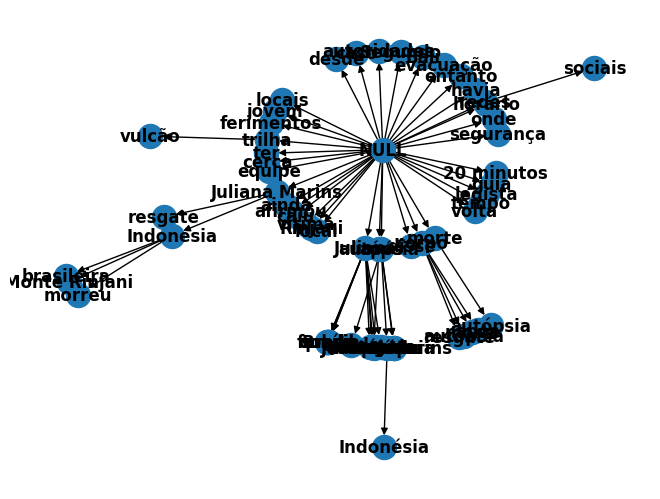

In [69]:
from trieofrules import trieofrules

#supported algorithms: FP-max, FP-growth, Apriori
#alg = 'Apriori'
alg = 'FP-max'
min_support = 0.04

obs = "p" if separar_paragrafos else "n"
obs = "titulos" if isTitulo else obs
file_name = f"{file}_{obs}_{alg}_{min_support}"
output_file = f"outputs/{file_name}.graphml"

# 2. Gera o TOR (Trie of Rules) a partir dos dados
print("Gerando árvore de regras (TOR)...")
TOR = trieofrules(data=pre_processing_result, alg=alg, min_support=min_support)
TOR.draw()

In [71]:
# 3. Salva a visualização e estrutura como .graphml
print("Salvando .graphml...")
TOR.save_graph(filename=output_file)

Salvando .graphml...


Analisando contexto das ocorrências

In [48]:
importlib.reload(ppn)

palavra_mais_usada = next(iter(TOR.frequent_items)).lower() 
ppn.concordance(noticias, palavra_mais_usada)

Número de ocorrências: 96

         o ato com o ex-presidente jair bolsonaro (pl) na avenida paulista neste domingo 
no rio de janeiro, também convocada por bolsonaro e aliados, reuniu cerca de 18,3 mil pes
to na paulista   como foi o ato além de bolsonaro, estavam presentes na manifestação o go
democracia.   por volta das 15h40, jair bolsonaro discursou e pediu anistia para os preso
as disse que "eleições em 2026 sem jair bolsonaro é negar a democracia, é escancarar a di
bunal superior eleitoral (tse) condenou bolsonaro à inelegibilidade até 2030 por abuso de
unanimidade tornar réus o ex-presidente bolsonaro e mais sete aliados por tentativa de go
pontos.  o ato com o ex-presidente jair bolsonaro (pl) e diversos aliados na avenida paul
o do tribunal superior eleitoral (tse), bolsonaro disse que “eleições em 26 sem jair bols
naro disse que “eleições em 26 sem jair bolsonaro é negar a democracia, é escancarar a di
 presença de público, o comício de jair bolsonaro na avenida paulista pod

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ranking de palavras p/ Nuvem de palavras

In [ ]:
import csv
import os
import importlib
import utils.analize_tor as ator

importlib.reload(ator)

pasta = "outputs_clusters_csv"
os.makedirs(pasta, exist_ok=True)

ranking = ator.ranking_words(pre_processing_result)
caminho = os.path.join(pasta, f"{file_name}_ranking_palavras.csv")
with open(caminho, mode="w", newline="", encoding="utf-8") as arquivo_csv:
    writer = csv.writer(arquivo_csv)
    writer.writerows(ranking)

Recomendar notícia mais compacta e relevante

In [72]:
import utils.analize_tor as ator

importlib.reload(ator)

proporcoes, resumo = ator.recomendar_resumo(noticias, output_file)
print("Texto recomendado:", resumo)

Melhor proporção: 15.45
Texto recomendado: A alpinista brasileira Juliana Marins morreu cerca de 20 minutos após cair e sofrer ferimentos graves enquanto escalava o Monte Rinjani, localizado na ilha de Lombok, na Indonésia. A estimativa foi divulgada com base na autópsia realizada no Hospital Bali Mandara, em Denpasar.

Segundo o médico legista Dr. Ida Bagus Putu Alit, responsável pela análise, a causa da morte foi uma lesão provocada por forte impacto nas costas, que causou intenso sangramento na cavidade torácica. “O impacto foi forte e ocorreu nas costas da vítima. Estimamos que a morte tenha ocorrido em cerca de 20 minutos após o ferimento”, afirmou o médico em coletiva de imprensa nesta sexta-feira (27).

Questionado sobre relatos de que Juliana ainda teria apresentado sinais de movimento após a queda, o perito preferiu não comentar. “Estamos apenas analisando os fatos com base nos achados da autópsia. Não há evidências de que a vítima tenha sobrevivido por um longo período após o

In [73]:
import utils.pre_processing_news as ppn
importlib.reload(ppn)

ppn.recomendar_resumo_centralidade_semantica(input_file)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Texto mais central semanticamente:

Título: Imagens inéditas revelam primeiras tentativas de resgate de Juliana Marins: 'Ela caiu em um penhasco', diz guia em gravação

Resumo: Imagens inéditas exibidas pelo Fantástico neste domingo (29) mostram as primeiras tentativas de resgate da publicitária Juliana Marins, de 26 anos, que morreu após cair de um penhasco durante uma trilha no Monte Rinjani, na Indonésia. Um registro feito pelo próprio guia mostra a lanterna do capacete de Juliana ainda acesa após a queda. Veja no vídeo acima.

“Ela caiu em um penhasco”, diz o guia na gravação.

O programa também entrevistou com exclusividade os pais de Juliana, que expressaram revolta e indignação com a condução do caso.

“Juliana falou para o guia que estava cansada e o guia falou: ‘senta aqui, fica sentada’. E o guia nos disse que ele se afastou por 5 a 10 minutos para fumar. Para fumar! Quando voltou, não avistou mais Juliana. Isso foi por volta de 4h. Ele só a avistou novamente às 6h08, quando 